# **Install Control Module**

In [1]:
!pip install control

# **Create Transfer Function**

Example 1.

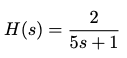

In [2]:
import numpy as np
import control as ct

In [3]:
num = np.array([2])
den = np.array([5, 1])
H = ct.tf(num, den)

print('H(s)=', H)

H(s)= 
   2
-------
5 s + 1



Example 2.

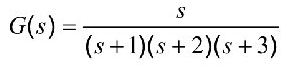

In [4]:
s = ct.tf('s')
G = s / ((s+1)*(s+2)*(s+3))

print('G(s)=', G)

G(s)= 
          s
----------------------
s^3 + 6 s^2 + 11 s + 6



# **Combination of Transfer Function**

- Series
- Parallel
- Feedback

## **1. Series**

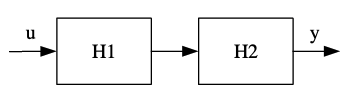

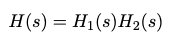

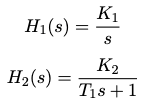

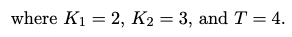

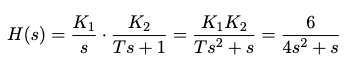

In [5]:
K1 = 2
K2 = 3
T = 4

s = ct.tf('s')

H1 = K1 / s
H2 = K2 / (T*s + 1)
H = ct.series(H1, H2)

print('H(s) = ', H)

H(s) =  
    6
---------
4 s^2 + s



In [6]:
H = ct.series(H1, H2, H1, H2, H2, H2, H1, H2, H2)
print('H(s) = ', H)

H(s) =  
                               5832
------------------------------------------------------------------
4096 s^9 + 6144 s^8 + 3840 s^7 + 1280 s^6 + 240 s^5 + 24 s^4 + s^3



### **2. Parallel**

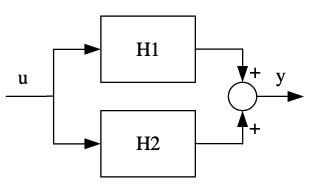

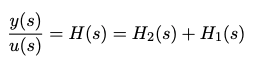

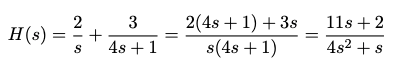

In [7]:
K1 = 2
K2 = 3
T = 4

H1 = K1 / s
H2 = K2 / (T*s + 1)
H = ct.parallel(H1, H2)

print('H(s) = ', H)

H(s) =  
11 s + 2
---------
4 s^2 + s



## **3. Feedback**

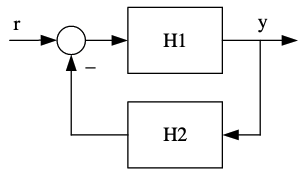

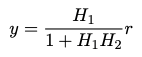

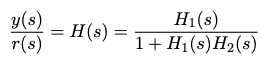

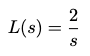

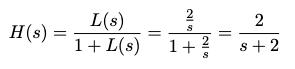

In [8]:
H1 = 2/s
H2 = 1
H = ct.feedback(H1, H2)

print('H(s) = ', H)

H(s) =  
  2
-----
s + 2



# **Numerator & Denominator of a Transfer Function**

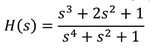

In [9]:
import numpy as np
import control as ct

s = ct.tf('s')

num = s**3 + s**2 + 1
den = s**4 + s**2 + 1
H = num/den
print('H(s) = ', H)

H(s) =  
s^3 + s^2 + 1
-------------
s^4 + s^2 + 1



In [10]:
nums, dens = ct.tfdata(H)

nums_array = np.array(nums)
dens_array = np.array(dens)

print('num=', nums_array)
print('den=', dens_array)

num= [[[1. 1. 0. 1.]]]
den= [[[1. 0. 1. 0. 1.]]]


In [11]:
print('num=', nums_array[0,0,:])
print('den=', dens_array[0,0,:])

num= [1. 1. 0. 1.]
den= [1. 0. 1. 0. 1.]


# **Response of a Transfer Function**

- Step Signal
- Impulse Signal
- Ramp Signal
- etc

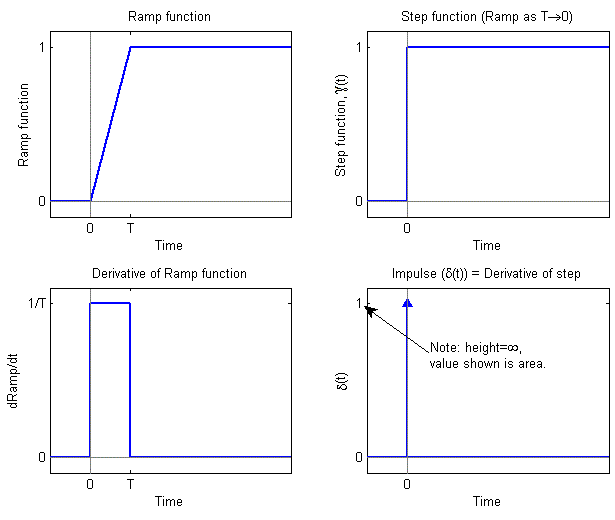

## **1. Step Input**

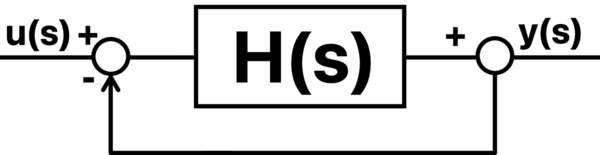

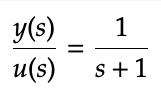

In [12]:
import numpy as np
import control as ct

s = ct.tf('s')

num = 1
den = s + 1
H = num/den
print('H(s) = ', H)

H(s) =  
  1
-----
s + 1



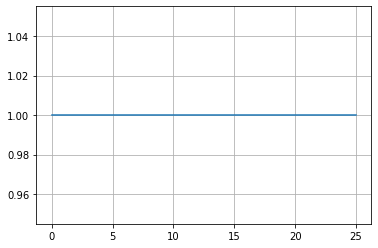

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

x1,y1 = ct.step_response(s/s)
plt.plot(x1, y1)
plt.grid()
plt.show()

In [14]:
x,y = ct.step_response(H)

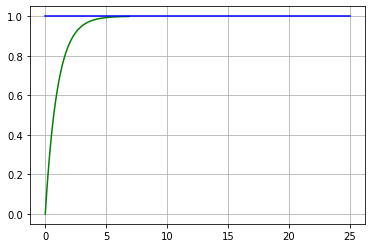

In [15]:
plt.plot(x, y, 'green', x1, y1, 'blue')
plt.grid()
plt.show()

## **2. Impulse Input**

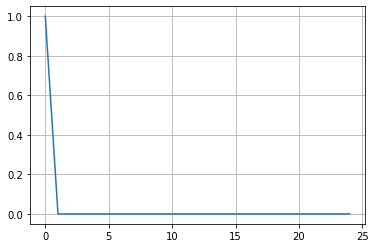

In [16]:
from scipy import signal as sg

y1 = sg.unit_impulse(25)
x1 = np.arange(0, 25)
plt.plot(x1,y1)
plt.grid()
plt.show()

In [17]:
x,y = ct.impulse_response(H)

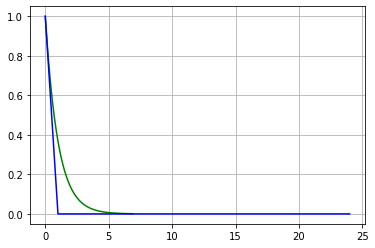

In [18]:
plt.plot(x, y, 'green', x1, y1, 'blue')
plt.grid()
plt.show()

## **3. Custom Input**

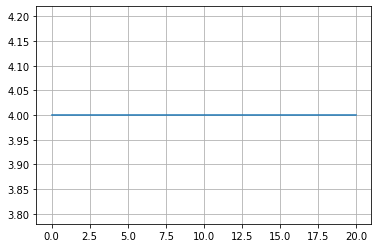

In [19]:
#create step input
x1 = np.linspace(0, 20, 100)
y1 = 4*np.ones(100)
plt.plot(x1, y1)
plt.grid()
plt.show()

In [20]:
x,y = ct.forced_response(H, x1, y1)

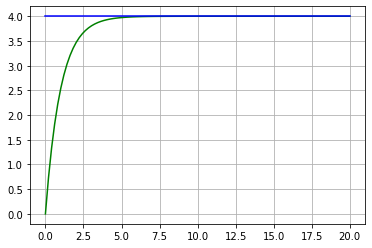

In [21]:
plt.plot(x, y, 'green', x1, y1, 'blue')
plt.grid()
plt.show()

## **Example: RLC Circuit**

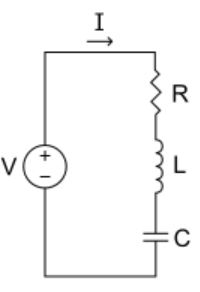

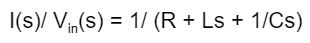

In [22]:
# RLC circuit models

import control as ct
import matplotlib

matplotlib.rcParams['figure.figsize'] = (16.0,6.0)
matplotlib.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

# System parameters
R = 1 #Ohms
C = 0.5 #Farads
L = 1 #Henries

# Transfer function from voltage source to current I(S)/V(S)
num = [1,0]
den = [L,R,1/C]
tf_lcr = ct.tf(num,den)
print(tf_lcr)


     s
-----------
s^2 + s + 2



Text(0, 0.5, 'Current [A]')

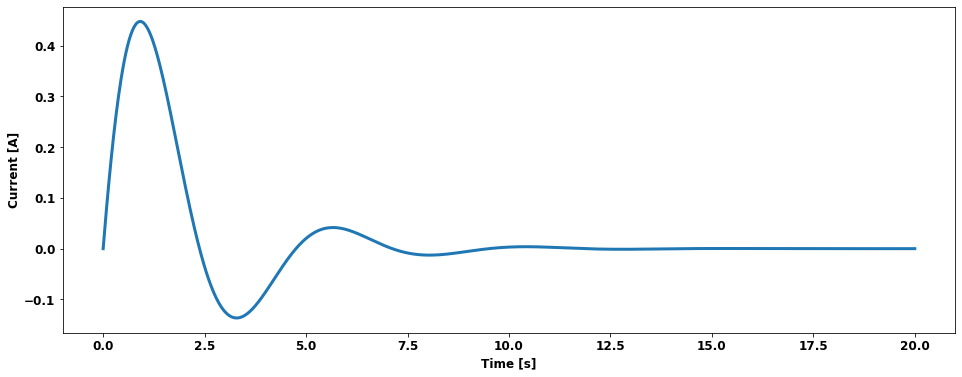

In [23]:
#Step response to step with tf
T = np.linspace(0,20,1000)
T, y_step = ct.step_response(tf_lcr,T)

plt.plot(T,y_step,lw = 3)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Current [A]", weight = 'bold')

# **Assignment**

1. Write the code to create this transfer function and get the step-response of each of that!

a. 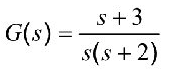

b. 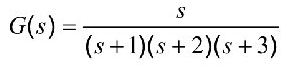

c. 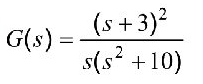

2. Using the control module write the code to get the transfer function of this block diagram!

a. 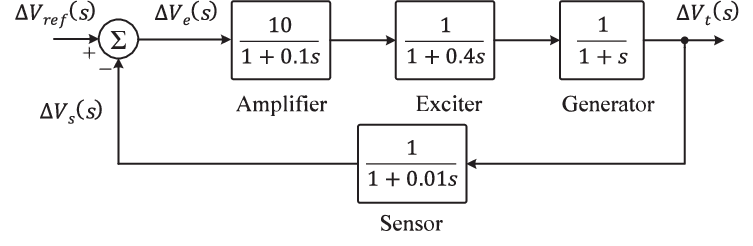

b. 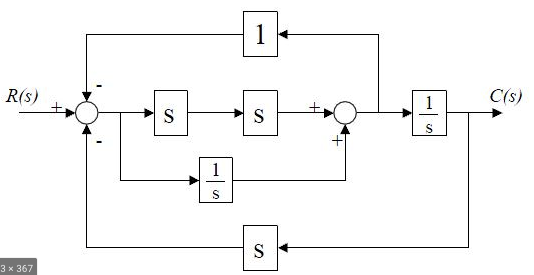

c. 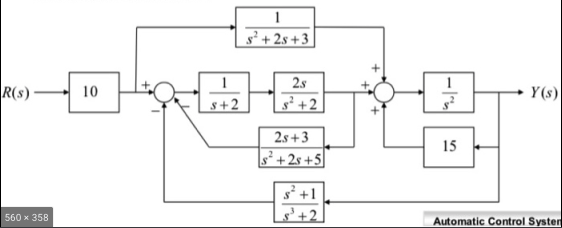

3. Get the transfer function Eo(t)/Ei(t) of the electrical circuit shown below and step response of it!

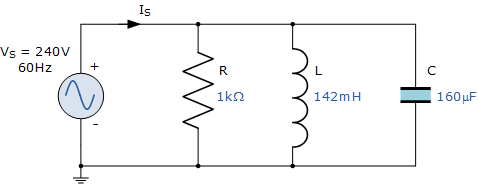

## **Solution**

1. a.

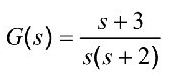

In [24]:
import control as ct

s = ct.tf('s')
G = (s+3)/(s*(s+2))

print('G(s)=', G)

G(s)= 
  s + 3
---------
s^2 + 2 s



1.b.

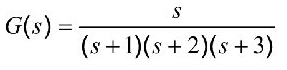

In [25]:
s = ct.tf('s')
G = s/((s+1)*(s+2)*(s+3))

print('G(s)=', G)

G(s)= 
          s
----------------------
s^3 + 6 s^2 + 11 s + 6



1.c.

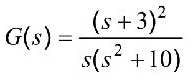

In [26]:
s = ct.tf('s')
G = ((s+3)**2) / (s*(s**2+10))

print('G(s)=', G)

G(s)= 
s^2 + 6 s + 9
-------------
 s^3 + 10 s



2.a.

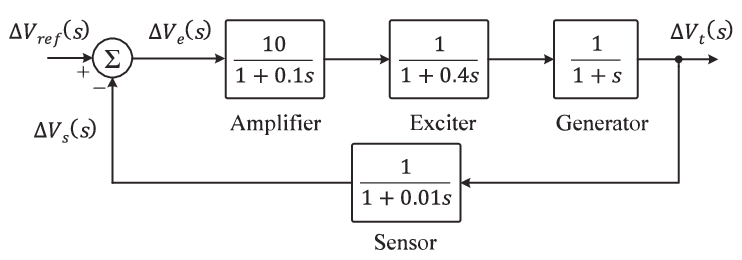

In [27]:
# Amplifier = A
# Exciter = E
# Generator = G
# Sensor = S

s = ct.tf('s')

A = 10 / (1+0.1*s)
E = 1 / (1+0.4*s)
G = 1 / (1+s)
S = 1 / (1+0.01*s)

AEG = ct.series(A, E, G)
AEGS = ct.feedback(AEG, S)

print('H(s)=', AEGS)

H(s)= 
                   0.1 s + 10
-------------------------------------------------
0.0004 s^4 + 0.0454 s^3 + 0.555 s^2 + 1.51 s + 11



2.b.

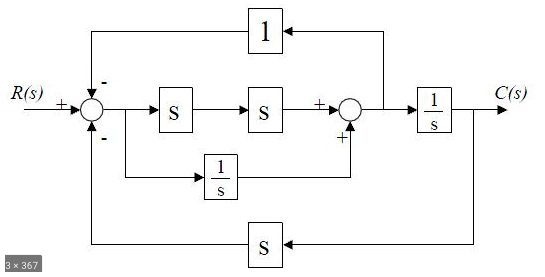

In [28]:
s = ct.tf('s')

A = s
B = s
C = 1 / (s)
D = 1
E = 1 / (s)
F = s

AB = ct.series(A, B)
ABC = ct.parallel(AB, C)
ABCD = ct.feedback(ABC, D)
ABCDE = ct.series(ABCD, E)
ABCDEF = ct.feedback(ABCDE, F)

print('H(s)=', ABCDEF)

H(s)= 
     s^3 + 1
-----------------
2 s^4 + s^2 + 2 s



2.c. 

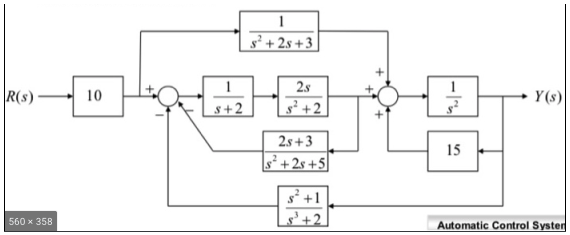

In [29]:
s = ct.tf('s')

A = 10
B = 1 / (s+2)
C = 2*s / (s**2+2)
D = (2*s+3) / (s**2+2*s+5)
E = 1 / (s**2+2*s+3)
F = (s**2+1) / (s**3+2)
G = 1 / (s**2)
H = 15

BC = ct.series(B, C)
BCD = ct.feedback(BC, D)
AE = ct.series(A, E)
GH = ct.feedback(G, H, 1)
BCDAE = ct.parallel(BCD, AE)
BCDAEGH = ct.series(BCDAE, GH)
BCDAEGHF = ct.feedback(BCDAEGH, F)
Final = ct.series(BCDAEGHF, A)

print('H(s)=', Final)

H(s)= 
                 120 s^8 + 480 s^7 + 1340 s^6 + 2760 s^5 + 3660 s^4 + 4680 s^3 + 5040 s^2 + 5400 s + 4000
--------------------------------------------------------------------------------------------------------------------------
s^12 + 6 s^11 + 7 s^10 - 32 s^9 - 217 s^8 - 680 s^7 - 1423 s^6 - 2262 s^5 - 2792 s^4 - 3302 s^3 - 3448 s^2 - 3090 s - 1600



3.

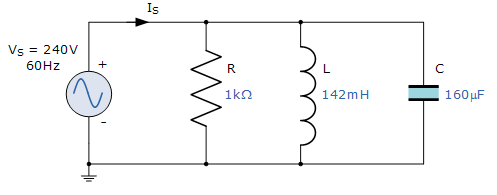

- IR(s) = V(s)/R
- IL(s) = V(s)/sL
- IC(s) = V(s)*sC
- I(s) = IR(s) + IL(s) + IC(s)


- H(s) = V(s) / I(s)
- H(s) = V(s) / (IR(s) + IL(s) + IC(s))
- H(s) = V(s) / ((V(s)/R) + (V(s)/sL) + (V(s)*sC))
- H(s) = (R.sL.V) / ((sL.V)+(R.V)+(R.C.sL.V)

H(s)= 
   3.408e+04 s
-----------------
39.53 s + 2.4e+05



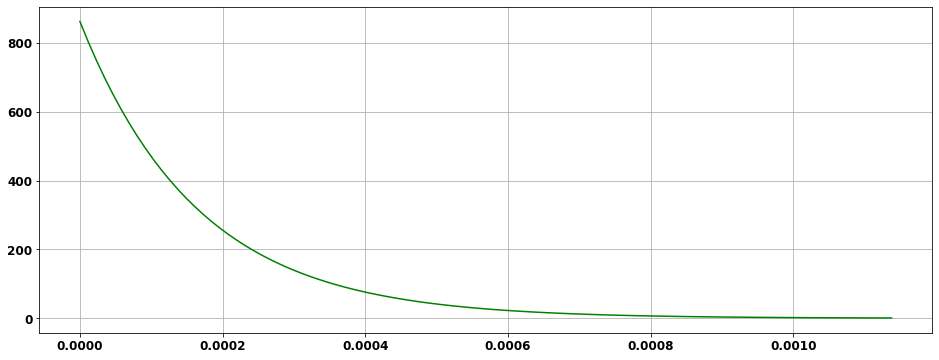

In [30]:
R = 1000
L = 142/1000
C = 160/10**6
V = 240

s = ct.tf('s')
H = (R*(s*L)*V) / (((s*L)*V)+(R*V)+(R*C*(s*L)*V))
print('H(s)=', H)

x,y = ct.step_response(H)
plt.plot(x, y, 'green')
plt.grid()
plt.show()